## Introduction

GDAL - the Geospatial Data Abstraction Library is a software library for reading and writing raster and vector geospatial data formats and forms the basis of most software for processing geospatial data.

There are many formats for using GDAL ranging from graphical tools like ArcGIS or QGIS to command line GDAL tools but here we're using the fantastic `rasterio` python package which provides a pythonic wrapping around GDAL. Basically it reads and writes geospatial formats and provides a Python API based on `numpy` N-dimensional arrays and GeoJSON.



## Module import in Python

Before we can get started, we need to tell Python that we will be using functions, classes, and variables from some packages. The technical wording for this is that we need to import these modules into our [namespace](http://en.wikipedia.org/wiki/Namespace) (see Python's documentation on the `module` system [here](https://docs.python.org/3/tutorial/modules.html)).

We will do this using some `import` statements:

In [ ]:
import rasterio     # import the main rasterio function
import matplotlib   # matplotlib is the primary python plotting and viz library
# this bit of magic allows matplotlib to plot inline in a jupyter notebook
%matplotlib inline  

# We can check which version we're running by printing the "__version__" variable
print("rasterio's version is: " + rasterio.__version__)
print(rasterio)

Once we import these packages Python will know where to look on our system for the code that implements them. When we want to access classes, variables, or functions within these packages, we will need to reference the full path (e.g. `rasterio.open()`)

### Examples
#### Open an image
When we open an image in rasterio we create a Dataset object. As the name would suggest, we can open an image with the "open" function within `rasterio`.

We will use an example image provided in the data directory for this chapter. This image is a subset of a Landsat 7 image containing the 8 bands on this sensor rearranged in order of wavelength (e.g., Landsat 7's second SWIR channel comes before thermal channel in our stack). The last band in this image is a cloud and cloud shadow mask from Fmask.

In [2]:
# filepath to our image
img_fp = '../data/LE70220492002106EDC00_stack.gtif'

# Open a geospatial dataset
dataset = rasterio.open(img_fp)
print(dataset)

<open DatasetReader name='../data/LE70220492002106EDC00_stack.gtif' mode='r'>


Now that we have this dataset open, let's explore some of its capabilities.

### Image attributes

In [3]:
# what is the name of this image
img_name = dataset.name
print('Image filename: {n}\n'.format(n=img_name))

# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# Does the raster have a description or metadata?
desc = dataset.descriptions
metadata = dataset.meta

print('Raster description: {desc}\n'.format(desc=desc))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj, '\n')

# What is the raster's "geo-transform"
gt = dataset.transform

print('Image geo-transform:\n{gt}\n'.format(gt=gt))

print('All raster metadata:')
print(metadata)
print('\n')

Image filename: ../data/LE70220492002106EDC00_stack.gtif

Number of bands in image: 8

Image size is: 250 rows x 250 columns

Raster description: ('band 1 reflectance', 'band 2 reflectance', 'band 3 reflectance', 'band 4 reflectance', 'band 5 reflectance', 'band 7 reflectance', 'band 6 temperature', 'Band 8')

Raster driver: GTiff

Image projection:
EPSG:32615 

Image geo-transform:
| 30.00, 0.00, 462405.00|
| 0.00,-30.00, 1741815.00|
| 0.00, 0.00, 1.00|

All raster metadata:
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 250, 'height': 250, 'count': 8, 'crs': CRS.from_epsg(32615), 'transform': Affine(30.0, 0.0, 462405.0,
       0.0, -30.0, 1741815.0)}




### Image raster bands

##### now for the fun part, actually visualizing and working with the data

The rasterio Dataset object we created contains a lot of useful information but it is not directly used to read in the raster image. Instead we will need to access the raster's bands using the `read()` method:

In [4]:
# Open the fourth band in our image - NIR here
nir = dataset.read(4)
nir.shape # check out the dimensions of the image

(250, 250)

In [5]:
# No alias
import numpy
print(numpy.__version__)

# Alias or rename to "np" -- a very common practice
import numpy as np
print(np.__version__)

1.16.4
1.16.4


In [6]:
# What are the band's datatypes?
datatype = dataset.dtypes
print('Band datatypes: {dt}'.format(dt=datatype))

# How about some band statistics?
band_mean = np.mean(nir)
band_min = np.amin(nir)
band_max = np.amax(nir)
band_stddev = np.std(nir)
print('Band range: {minimum} - {maximum}'.format(maximum=band_max,
                                                 minimum=band_min))
print('Band mean, stddev: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band datatypes: ('int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16', 'int16')
Band range: 1007 - 8178
Band mean, stddev: 2700.18344, 710.1296021415855



In [7]:
full_img = dataset.read()
full_img.shape # bands, rows, cols

(8, 250, 250)

With our data read into a NumPy array, we can print it to console and even perform statistics on it. In addition to helping us store massive amounts of data efficiently, NumPy will help us with some basic linear algebra, numerical operations, and summary statistics.

For now let's plot that near infrared band we read in earlier.

Image dimensions:  (8, 250, 250)


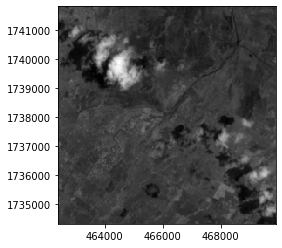

In [8]:
from rasterio.plot import show # import the show function which allows us to display the image

print("Image dimensions: ", full_img.shape)
show(nir, transform=dataset.transform, cmap='gray')